<a href="https://colab.research.google.com/github/Mohsinnmalik/CODSFOT-DATASCIENCE-PROJECT/blob/main/TITANICSURVIVALPREDICTION_USING_PYTHONN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and Loading Data

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load the Titanic dataset

In [186]:
titanic_data = pd.read_csv('/content/archive (2).zip')


# Data Information and Data Cleaning

In [187]:
def calculate_missing_percent(dataframe):
    missing_values = dataframe.isna().sum()
    percentage_missing = (missing_values / len(dataframe) * 100).round(2)
    result = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
    result['Percentage'] = result['Percentage'].astype(str) + '%'
    return result

missing_values_info = calculate_missing_percent(titanic_data)


# Drop rows with missing values

cleaned_data = titanic_data.dropna()


# Round and convert columns to appropriate data types

In [188]:
cleaned_data['Age'] = cleaned_data['Age'].round().astype(int)
cleaned_data['Fare'] = cleaned_data['Fare'].round().astype(int)


# Drop unnecessary columns

In [189]:
if 'Cabin' in cleaned_data.columns:
    cleaned_data.drop(['Cabin'], axis=1, inplace=True)
if 'Embarked' in cleaned_data.columns:
    cleaned_data.drop(['Embarked'], axis=1, inplace=True)


# Encode categorical variable 'Sex'

In [190]:
if 'Sex' in cleaned_data.columns:
    cleaned_data = pd.get_dummies(cleaned_data, columns=['Sex'], drop_first=True)

# Data Visualization
# Animated scatter plot for Age vs. Fare

In [191]:
fig_age_fare = px.scatter(cleaned_data, x='Age', y='Fare', color='Survived', animation_frame='Pclass',
                           title='Titanic Survival Prediction: Age vs. Fare Animation',
                           labels={'Age': 'Age', 'Fare': 'Fare', 'Survived': 'Survived', 'Pclass': 'Ticket Class'},
                           template='plotly_dark')

fig_age_fare.update_layout(updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play',
                                            method='animate', args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=True)]),
                                           dict(label='Pause', method='animate', args=[[None], dict(frame=dict(duration=0, redraw=True),
                                            mode='immediate', transition=dict(duration=0))])])])


# Building Model

In [192]:
X = cleaned_data.drop('Survived', axis=1)
y = cleaned_data['Survived']

# Encode categorical variable 'Sex'

# Use StandardScaler for feature scaling

In [193]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)


# Random Forest Classifier

In [195]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


# Model Evaluation

In [196]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Plot Confusion Matrix

In [197]:
fig_conf_matrix = px.imshow(conf_matrix, labels=dict(x="Predicted", y="Actual", color="Count"),
                            x=['Not Survived', 'Survived'], y=['Not Survived', 'Survived'],
                            title='Titanic Survival Prediction: Confusion Matrix',
                            color_continuous_scale='Viridis', template='plotly_dark')


FINAL RESULT:-

In [198]:
fig = make_subplots(rows=2, cols=2, subplot_titles=('Age vs. Fare Animation', 'Model Accuracy', 'Confusion Matrix'),
                    specs=[[{'type': 'scatter'}, {'type': 'indicator'}],
                           [{'type': 'heatmap', 'colspan': 2}, None]])

fig.add_trace(fig_age_fare['data'][0], row=1, col=1)
fig.add_trace(go.Indicator(mode="number", value=accuracy, title="Accuracy", number={'valueformat': '.2%'}), row=1, col=2)
fig.add_trace(fig_conf_matrix['data'][0], row=2, col=1)

In [199]:
fig.update_layout(showlegend=False, height=600, width=800,
                  title_text="Titanic Survival Prediction Analysis",
                  template='plotly_dark')


In [200]:
fig.add_annotation(
    go.layout.Annotation(
        text="Coded and Created by MohsinMalik",
        showarrow=False,
        xref="paper",
        yref="paper",
        x=0.5,
        y=0.02,
        font=dict(size=10, color="white")
    )
)


In [201]:
fig.show()


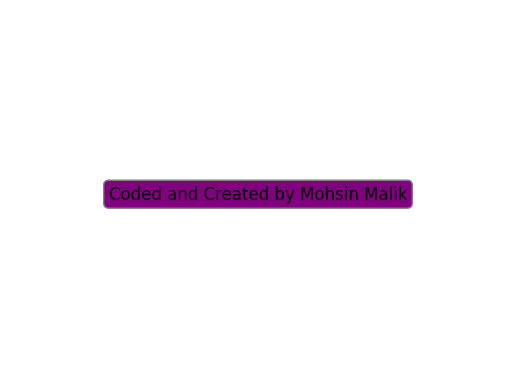

In [202]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.text(0.5, 0.5, 'Coded and Created by Mohsin Malik',
        size=12, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='purple', edgecolor='gray'))
ax.set_xticks([])
ax.set_yticks([])
ax.set_axis_off()
plt.show()